### Assignment: Evaluate Binary Classifier Performance (from Scratch)

In this assignment, you're required to implement functions to calculate the following binary classification performance metrics from scratch. **Only use NumPy and Matplotlib for calculations and visualization** .
DO NOT use scikit-learn or any other library.


* Accuracy
* Confusion matrix
* Percision
* Recall
* F1 score
* AUC of ROC


You're also required to implement functions to display the following
* Confusion matrix
* Percision VS Recall curve
* ROC curve



## DON'T CHANGE THE CODE BELOW

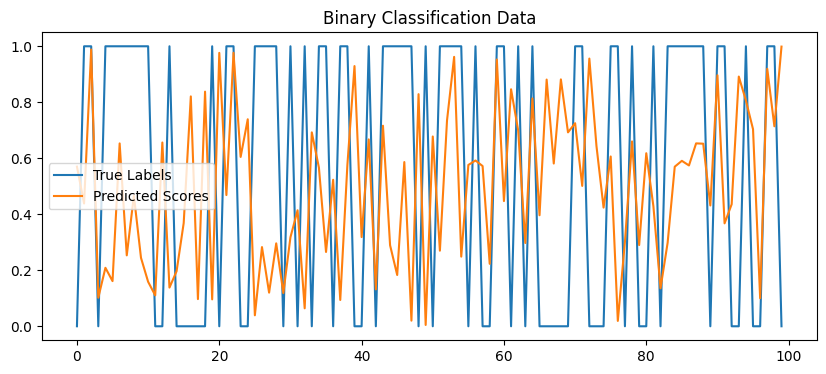

In [1]:
import numpy as np
import matplotlib.pyplot as plt



# Set random seed for reproducibility
np.random.seed(0)
# Simulate binary classification problem
# Real labels
y = np.random.randint(2, size=(100, 1))          # Generating random labels

y_preds = np.random.uniform(0, 1, size=(100, 1)) # Generating random predictions


# Plot the data for quick visualization
plt.figure(figsize=(10, 4))
plt.plot(y, label='True Labels')
plt.plot(y_preds, label='Predicted Scores')
plt.legend()
plt.title("Binary Classification Data")
plt.show()

### Now complete your implementation below:
👉 Start by creating functions for each of the metrics and plotting tasks.

🔚 Once you finish:
Run all notebook cells

Save the notebook as PDF

Upload it to the classroom

In [2]:
# Simulate binary classification problem
np.random.seed(0)
y_true = np.random.randint(2, size=(100, 1)).flatten()
y_scores = np.random.uniform(0, 1, size=(100, 1)).flatten()
y_pred = (y_scores >= 0.5).astype(int)

In [3]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [4]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[TN, FP], [FN, TP]])


In [5]:
def precision(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

In [6]:
def recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

In [7]:
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0

In [8]:
def roc_auc(y_true, y_scores):
    thresholds = np.linspace(0, 1, 101)
    tpr_list = []
    fpr_list = []
    for t in thresholds:
        y_pred_t = (y_scores >= t).astype(int)
        TP = np.sum((y_true == 1) & (y_pred_t == 1))
        TN = np.sum((y_true == 0) & (y_pred_t == 0))
        FP = np.sum((y_true == 0) & (y_pred_t == 1))
        FN = np.sum((y_true == 1) & (y_pred_t == 0))
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    auc = np.trapz(tpr_list, fpr_list)
    return auc, fpr_list, tpr_list

In [ ]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar(cax)
    ax.set_xticklabels([''] + ['0', '1'])
    ax.set_yticklabels([''] + ['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), va='center', ha='center')
    plt.title('Confusion Matrix')
    plt.show()

In [10]:
# Plot Precision vs Recall
def plot_precision_recall(y_true, y_scores):
    thresholds = np.linspace(0, 1, 101)
    precision_list = []
    recall_list = []
    for t in thresholds:
        y_pred_t = (y_scores >= t).astype(int)
        precision_list.append(precision(y_true, y_pred_t))
        recall_list.append(recall(y_true, y_pred_t))
    plt.plot(recall_list, precision_list, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall Curve')
    plt.grid(True)
    plt.show()

In [11]:
# Plot ROC Curve
def plot_roc(y_true, y_scores):
    auc, fpr_list, tpr_list = roc_auc(y_true, y_scores)
    plt.plot(fpr_list, tpr_list, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (AUC = {auc:.2f})')
    plt.grid(True)
    plt.show()

In [ ]:
# Results 
print("Accuracy:", accuracy(y_true, y_pred))
print("Precision:", precision(y_true, y_pred))
print("Recall:", recall(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC:", roc_auc(y_true, y_scores)[0])


Accuracy: 0.46
Precision: 0.5192307692307693
Recall: 0.48214285714285715
F1 Score: 0.5
AUC: -0.4265422077922078


C:\Users\mogeb\AppData\Local\Temp\ipykernel_5900\640375935.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['0', '1'])
C:\Users\mogeb\AppData\Local\Temp\ipykernel_5900\640375935.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['0', '1'])


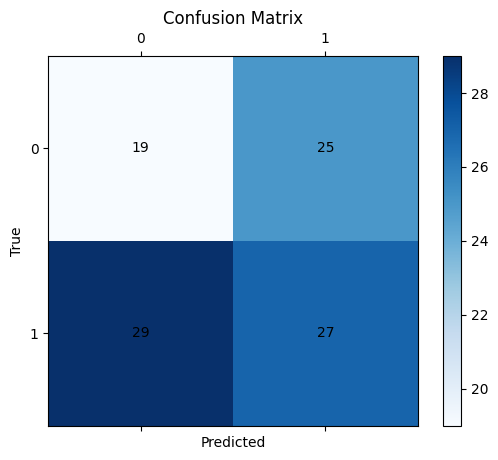

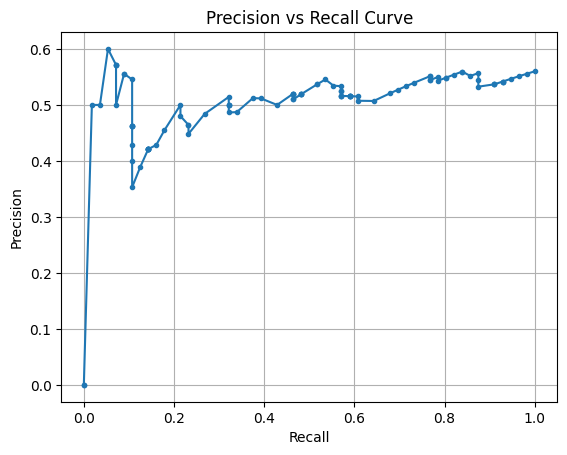

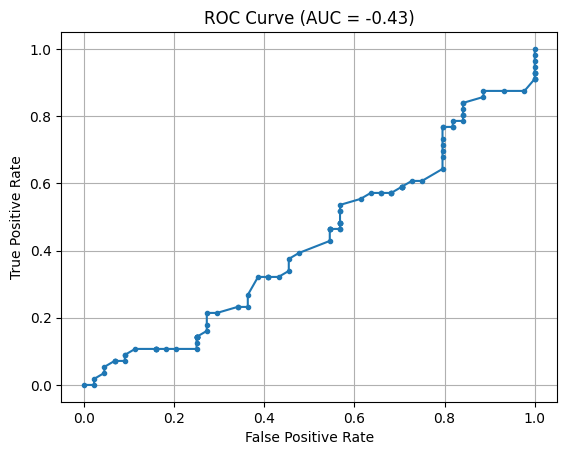

In [13]:
# Plotting
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm)
plot_precision_recall(y_true, y_scores)
plot_roc(y_true, y_scores)